In [30]:
# making country masks with Regionmask: 
# https://regionmask.readthedocs.io/en/stable/notebooks/mask_xarray.html

In [31]:
# some default settings
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [32]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
import regionmask               # making masks

In [33]:
# read in a NetCDF file
fname = '/exports/csce/datastore/geos/users/msadiq/EDGARv5/v50_CO2_excl_short-cycle_org_C_2018.0.1x0.1.nc'
ds = xr.open_dataset(fname)
dr = ds['emi_co2'] # dataarray
dr

<xarray.DataArray 'emi_co2' (lat: 1800, lon: 3600)>
[6480000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 0.05 0.15 0.25 0.35 ... 359.65 359.75 359.85 359.95
Attributes:
    standard_name:  tendency_of_atmosphere_mass_content_of_carbon_dioxide_due...
    long_name:      Emissions of CO2 - 
    units:          kg m-2 s-1
    cell_method:    time: mean (interval: 1 year, 365 days)
    total_emi_co2:     3.78867e+013 kg/year
    comment:         (see http://edgar.jrc.ec.europa.eu/methodology.php#12sou...

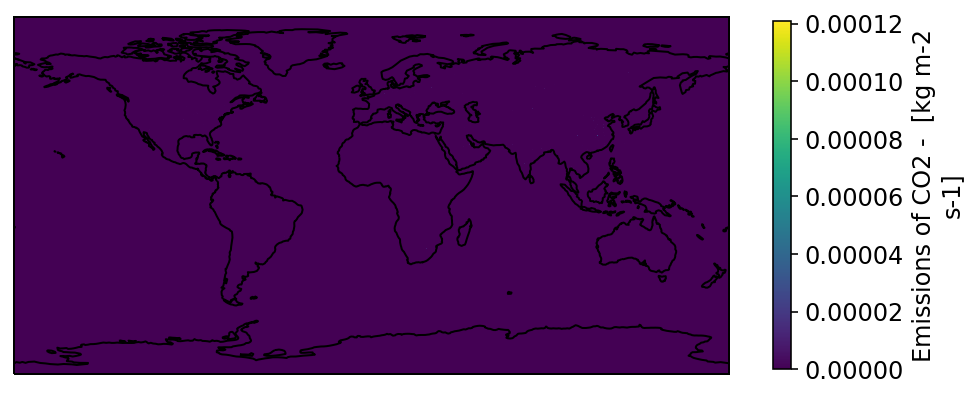

In [34]:
# plot a map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)

dr.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8})

ax.coastlines();

In [35]:
# create masks: https://regionmask.readthedocs.io/en/stable/notebooks/mask_xarray.html
# country mask at 1:110m resolution, this takes a while
mask_countries = regionmask.defined_regions.natural_earth.countries_110.mask(dr)

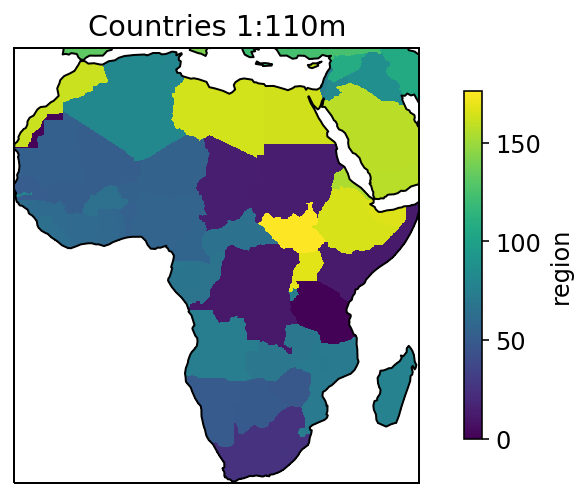

In [36]:
# plot the mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

mask_countries.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8,})
ax.set_title("Countries 1:110m")
ax.coastlines()
ax.set_extent([-17, 51, -35, 38], crs=ccrs.PlateCarree());

#fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/emission/plots/masks_Africa.png', dpi=300)

In [37]:
mask_countries

<xarray.DataArray 'region' (lat: 1800, lon: 3600)>
array([[159., 159., 159., ..., 159., 159., 159.],
       [159., 159., 159., ..., 159., 159., 159.],
       [159., 159., 159., ..., 159., 159., 159.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 0.05 0.15 0.25 0.35 ... 359.65 359.75 359.85 359.95

In [38]:
country_names = regionmask.defined_regions.natural_earth.countries_110.names
country_name_abbrevs = regionmask.defined_regions.natural_earth.countries_110.abbrevs
country_names

['Fiji',
 'Tanzania',
 'W. Sahara',
 'Canada',
 'United States of America',
 'Kazakhstan',
 'Uzbekistan',
 'Papua New Guinea',
 'Indonesia',
 'Argentina',
 'Chile',
 'Dem. Rep. Congo',
 'Somalia',
 'Kenya',
 'Sudan',
 'Chad',
 'Haiti',
 'Dominican Rep.',
 'Russia',
 'Bahamas',
 'Falkland Is.',
 'Norway',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Timor-Leste',
 'South Africa',
 'Lesotho',
 'Mexico',
 'Uruguay',
 'Brazil',
 'Bolivia',
 'Peru',
 'Colombia',
 'Panama',
 'Costa Rica',
 'Nicaragua',
 'Honduras',
 'El Salvador',
 'Guatemala',
 'Belize',
 'Venezuela',
 'Guyana',
 'Suriname',
 'France',
 'Ecuador',
 'Puerto Rico',
 'Jamaica',
 'Cuba',
 'Zimbabwe',
 'Botswana',
 'Namibia',
 'Senegal',
 'Mali',
 'Mauritania',
 'Benin',
 'Niger',
 'Nigeria',
 'Cameroon',
 'Togo',
 'Ghana',
 "CÃ´te d'Ivoire",
 'Guinea',
 'Guinea-Bissau',
 'Liberia',
 'Sierra Leone',
 'Burkina Faso',
 'Central African Rep.',
 'Congo',
 'Gabon',
 'Eq. Guinea',
 'Zambia',
 'Malawi',
 'Mozambique',
 'eSwatini',
 'Ango

In [39]:
# country mask at 1:50m, this takes longer
mask_countries_50 = regionmask.defined_regions.natural_earth.countries_50.mask(dr)


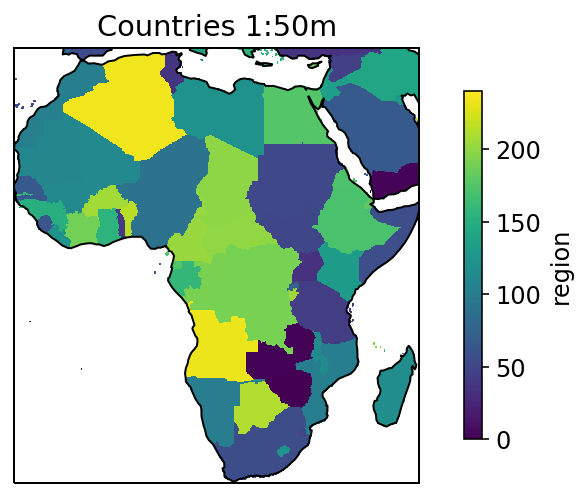

In [40]:
# plot the mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

mask_countries_50.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8,})
ax.set_title("Countries 1:50m")
ax.coastlines()
ax.set_extent([-17, 51, -35, 38], crs=ccrs.PlateCarree());


In [41]:
# using the mask
# you can group over all integer values of the mask
# and compute mean (or total) values for each country
co2_mean = dr.groupby(mask_countries).mean('stacked_lat_lon')

# extract the abbreviations and the names of the regions from regionmask
abbrevs = regionmask.defined_regions.natural_earth.countries_110[co2_mean.region.values].abbrevs
names = regionmask.defined_regions.natural_earth.countries_110[co2_mean.region.values].names

co2_mean.coords['abbrevs'] = ('region', abbrevs)
co2_mean.coords['names'] = ('region', names)

In [42]:
co2_mean

<xarray.DataArray 'emi_co2' (region: 177)>
array([2.02795492e-09, 3.70018377e-10, 3.17373697e-11, 1.36891642e-09,
       1.52589266e-08, 3.67081765e-09, 6.94189461e-09, 2.24920749e-10,
       7.11255899e-09, 2.28061592e-09, 2.90313640e-09, 6.32815952e-11,
       5.99713335e-11, 1.13825260e-09, 2.45526294e-10, 2.92217153e-11,
       3.99209243e-09, 1.59352442e-08, 2.72812861e-09, 1.93086014e-09,
       5.37676050e-11, 2.61806599e-09, 2.12721507e-11, 0.00000000e+00,
       5.87125348e-10, 1.16976580e-08, 8.78088158e-10, 7.57819762e-09,
       9.48215617e-10, 1.87100158e-09, 6.79504286e-10, 1.40315237e-09,
       2.43610865e-09, 4.96347718e-09, 5.18219823e-09, 1.57019331e-09,
       2.89493429e-09, 1.23375665e-08, 6.04275208e-09, 5.05714137e-10,
       3.51909613e-09, 1.15739848e-10, 4.84727258e-10, 1.77137753e-08,
       5.26412069e-09, 1.33590072e-08, 1.95362730e-08, 7.62134977e-09,
       1.11528209e-09, 6.55091648e-10, 1.80728724e-10, 1.72407644e-09,
       4.48150406e-11, 1.06378135e-10, 2.03796890e-09, 7.65311842e-11,
       3.40029072e-09, 6.65238031e-10, 1.90687333e-09, 2.23291519e-09,
       1.33261535e-09, 4.16088802e-10, 4.37183789e-10, 4.28259594e-10,
       6.11592776e-10, 4.74847828e-10, 3.79653115e-11, 3.92369442e-10,
       5.44520429e-10, 1.69620218e-09, 1.94633878e-10, 5.28554034e-10,
       4.17825996e-10, 3.26059357e-09, 6.03394446e-10, 4.39117853e-10,
       6.64583197e-08, 7.05935008e-08, 2.08203649e-10, 4.45313404e-08,
       1.48582024e-09, 6.44075504e-09, 2.43246978e-09, 1.04322799e-08,
       7.86732883e-08, 1.17485143e-07, 1.40149950e-07, 1.36788234e-08,
       8.45065706e-09, 3.25707065e-11, 2.10824402e-09, 1.69378573e-08,
       8.13757617e-10, 1.56927937e-09, 2.48113441e-08, 8.02873412e-09,
       1.94167129e-07, 4.47755000e-10, 2.52954280e-08, 2.15366001e-08,
       1.20221577e-09, 2.47020937e-09, 7.12833348e-09, 6.81019685e-10,
       1.66687986e-09, 2.07544693e-09, 5.58669466e-09, 1.42057237e-08,
       5.12719334e-09, 7.37154249e-09, 2.55579446e-09, 1.01563735e-08,
       1.04824940e-08, 3.36533539e-08, 2.96169773e-08, 1.93375165e-08,
       8.63086758e-09, 1.14740502e-08, 7.27313987e-09, 4.75726747e-09,
       1.73514945e-08, 6.86594177e-08, 1.34859510e-08, 1.52042823e-08,
       1.56157576e-08, 5.67440450e-09, 1.18258825e-08, 3.08580468e-08,
       1.09699542e-07, 1.21291734e-07, 1.28605478e-07, 1.73385306e-08,
       1.63118674e-08, 1.68934253e-08, 9.49202938e-09, 2.06145948e-10,
       3.92303434e-09, 1.68579783e-09, 9.85728921e-09, 3.59021399e-08,
       1.71678380e-07, 3.41004096e-08, 2.09048103e-08, 4.63202809e-08,
       1.27212541e-09, 1.24328938e-08, 5.28998134e-09, 1.41584451e-08,
       2.37264057e-08, 2.18111591e-08, 2.66253917e-08, 3.93592048e-09,
       2.59187960e-08, 4.94550569e-08, 2.61707905e-10, 8.25133881e-08,
       6.81501355e-10, 8.78889517e-10, 9.03419384e-09, 7.70587377e-15,
       1.26359403e-08, 3.37633637e-08, 3.86486887e-09, 7.67942776e-09,
       7.79378895e-10, 5.00201491e-10, 8.13523859e-10, 6.56103991e-11,
       7.34307781e-10, 1.43570877e-09, 1.79365145e-08, 1.11073346e-08,
       2.27871375e-08, 8.65990923e-09, 9.47199297e-09, 1.35461434e-07,
       3.80160264e-10], dtype=float32)
Coordinates:
  * region   (region) float64 0.0 1.0 2.0 3.0 4.0 ... 173.0 174.0 175.0 176.0
    abbrevs  (region) <U4 'FJ' 'TZ' 'WS' 'CA' 'US' ... 'RS' 'ME' 'KO' 'TT' 'SS'
    names    (region) <U24 'Fiji' 'Tanzania' ... 'S. Sudan'

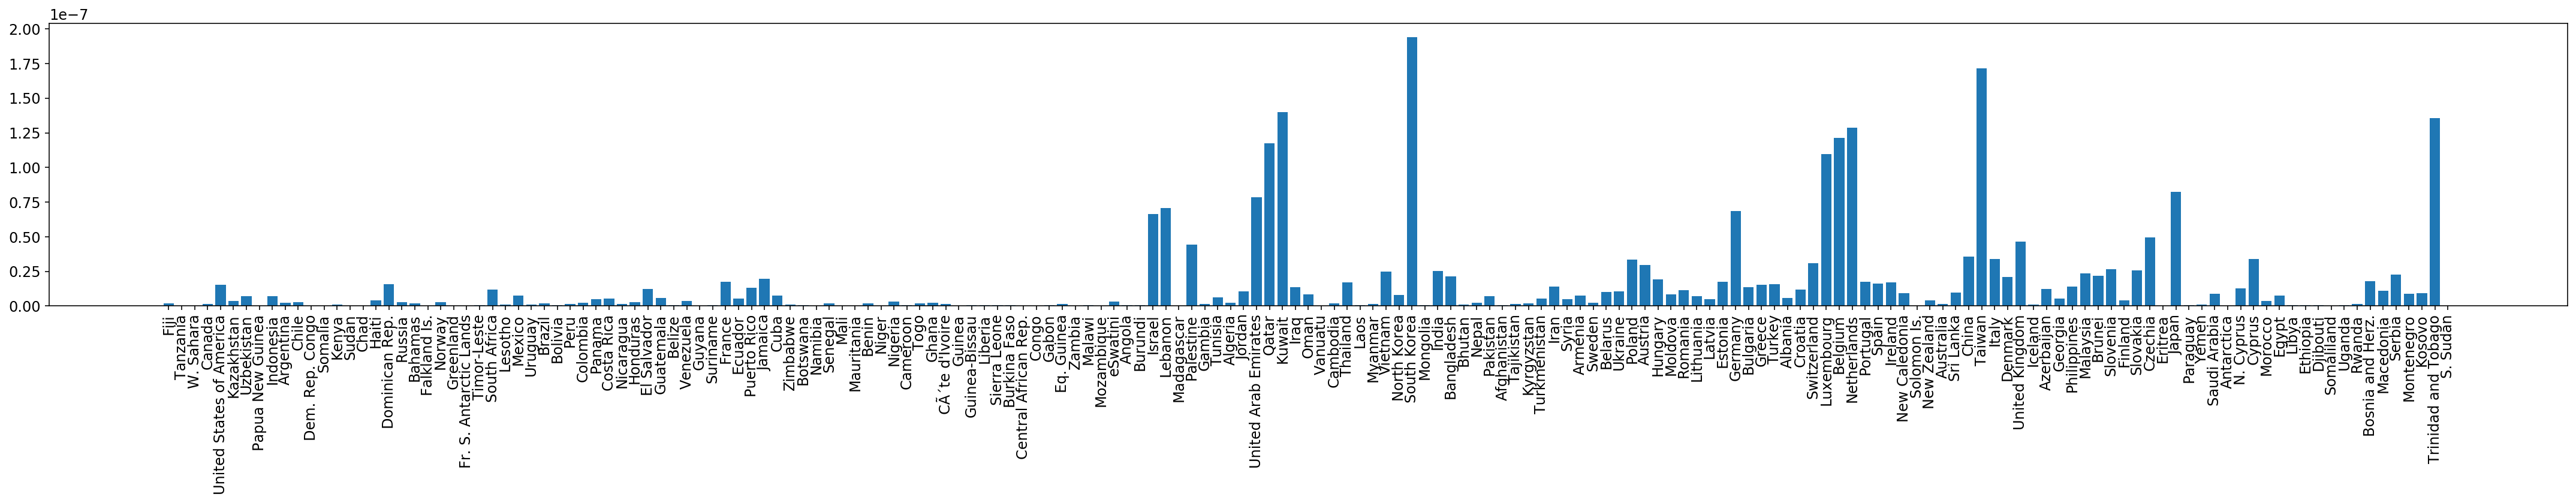

In [43]:
fig = plt.figure(figsize=[30, 6])
plt.bar(names,co2_mean.values)
plt.xticks(rotation=90)

fig.tight_layout()